# Problem 1


In [1]:
ALPHABET = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

def permutation(n: int) -> int:
    mul = 1
    for i in range(1, n + 1):
        mul *= i
    return mul

def combination(n: int, c: int) -> int:
    if n < c:
        return 0
    return permutation(n) / (permutation(n-c) * permutation(c))


def index_of_coincidence(text: str) -> float:
    counts = dict()
    for c in text:
        counts[c] = counts.get(c, 0) + 1
    
    numerator = sum([combination(counts.get(c, 0), 2) for c in ALPHABET])
    denominator = combination(len(text), 2)

    return numerator / denominator

def block_align(text: str, blocksize: int, offset: int) -> str:
    """Return a sub-ciphertext that is the offset'th byte of each block"""
    i = offset
    subtext = []
    while i < len(text):
        subtext.append(text[i])
        i += blocksize
    return "".join(subtext)

def score_blocksize(text: str, reference_ioc: float, blocksize: int) -> float:
    mse = 0
    for offset in range(blocksize):
        subtext = block_align(text, blocksize, offset)
        subtext_ioc = index_of_coincidence(subtext)
        mse += (reference_ioc - subtext_ioc) ** 2
    return mse / blocksize

def search_blocksizes(text: str, reference_ioc: float, max_blocksize: int) -> list[tuple[int, float]]:
    blocksizes = []

    for blocksize in range(1, max_blocksize + 1):
        score = score_blocksize(text, reference_ioc, blocksize)
        blocksizes.append((blocksize, score))
    
    blocksizes.sort(key=lambda x: x[1])

    return blocksizes

if __name__ == "__main__":
    with open("inputs/q1-mobydick.txt") as f:
        text = f.read()
        reference_ioc = index_of_coincidence(text)
        print(f"Moby Dick's index of coincidence {reference_ioc}")
    
    with open("inputs/q1-ciphertext.txt") as f:
        ciphertext = f.read()
    blocksizes = search_blocksizes(ciphertext, reference_ioc, 100)
    for blocksize, score in blocksizes[:10]:
        print(f"Score of blocksize {blocksize}:\t{score:.6f}")

Moby Dick's index of coincidence 0.06592077212956918
Score of blocksize 21:	0.000007
Score of blocksize 42:	0.000013
Score of blocksize 63:	0.000022
Score of blocksize 84:	0.000026
Score of blocksize 28:	0.000380
Score of blocksize 7:	0.000381
Score of blocksize 14:	0.000382
Score of blocksize 56:	0.000386
Score of blocksize 77:	0.000389
Score of blocksize 35:	0.000390


## a)
Note that the definition of this assignemnt is missing a constant factor 26 (size of the English alphabet), which is okay since we are exclusively working with the English alphabet (instead of with, say, the German alphabet and the French alphabet as well). Without the constant factor, the index of coincidence is 0.06592; with the constant factor, the index of coincidence is 1.7139, which closely matches with the reference IoC (1.73) listed on [Wikipedia](https://en.wikipedia.org/wiki/Index_of_coincidence).

## b)
Using the code below, we can rank all possible blocksizes by some kind of metrics that measure the average distance between sub-ciphertext IoC and the reference IoC. In this implementation, I choose to use mean-square-error (mean of square of difference between IoC's). For my input, the top candidates are listed above in the code block.

Notice that the first four candidates are multiples of the top candidate, which makes sense since we can simply concatenate keys without affecting the encrpytion scheme. I think this is strong evidence that **21** is the correct key size.

## c)
The approach in part (b) relies on the assumption that the same character at the same offset in each plaintext block is always encrypted to the same character in the ciphertext (e.g. if an at offset of one plaintext block is encrypted to , then any at offset of all plaintext blocks is encrypted to ). However, this assumption is not true for the transposition cipher, where the corresponding ciphertext character of a block depends on the content of the rest of the block. Therefore, computing index of coincidence using aligned ciphertext blocks is not an effective approach to identify the blocksize of a transposition cipher.

# Problem 2
UW user id `g66xu`

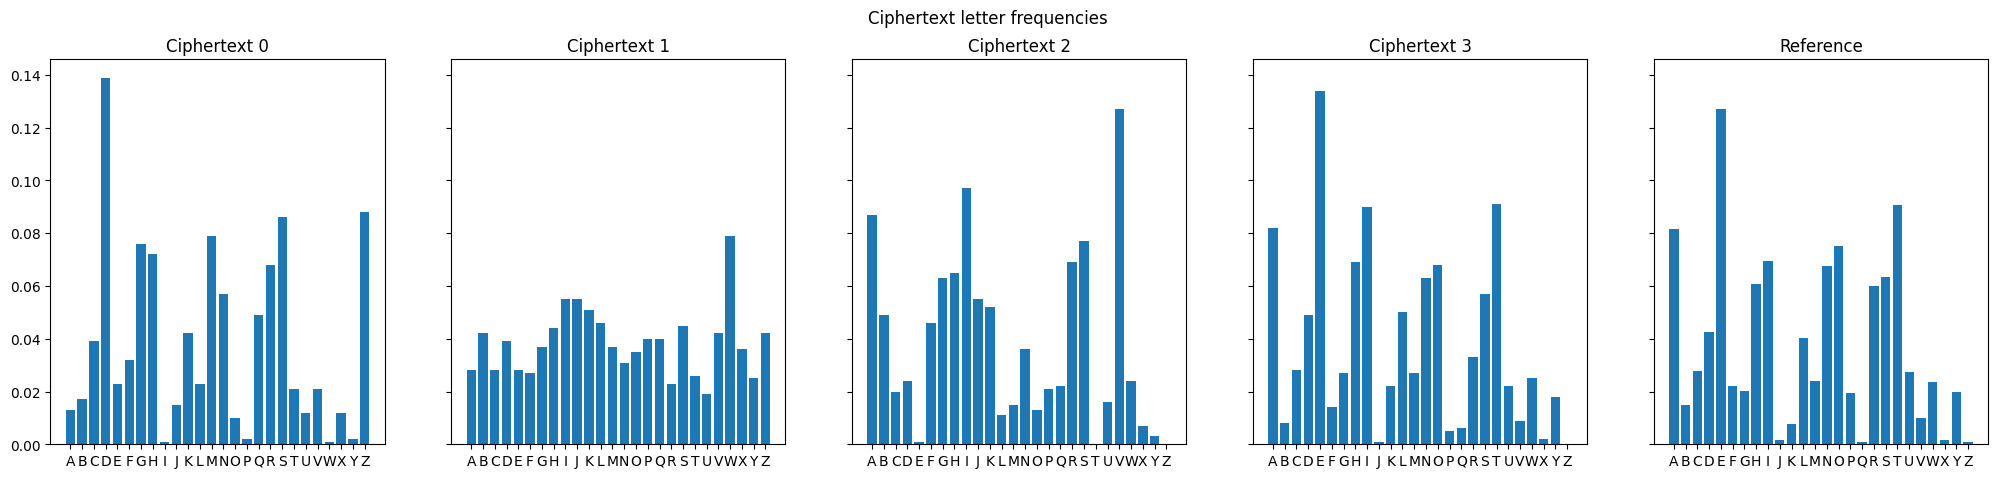

In [2]:
import matplotlib.pyplot as plt

ALPHABET = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
# credit: https://pi.math.cornell.edu/~mec/2003-2004/cryptography/subs/frequencies.html
REF_FREQUENCIES = [
    0.08167, 0.01492, 0.02782, 0.04253, 0.12702, 0.02228, 0.02015, 0.06094, 
    0.06966, 0.00153, 0.00772, 0.04025, 0.02406, 0.06749, 0.07507, 0.01929, 
    0.00095, 0.05987, 0.06327, 0.09056, 0.02758, 0.00978, 0.02360, 0.00150, 
    0.01974, 0.00074,
];

def char_frequencies(ciphertext_str: str) -> dict[str, float]:
    """Return a dictionary that maps individual characters to percentage
    frequencies
    """
    frequencies = {}
    for char in ciphertext_str:
        frequencies[char] = frequencies.get(char, 0) + 1
    
    for char in ALPHABET:
        frequencies[char] = frequencies.get(char, 0) / len(ciphertext_str)
    
    return frequencies

def sort_frequencies(frequencies: dict[str, float]) -> list[float]:
    """Given a dictionary of character frequencies, return a list with
    frequency values sorted in descending order
    """
    return sorted(list(frequencies.values()), reverse=True)


fig, subplots = plt.subplots(1, 5, sharex=True, sharey=True)
fig.suptitle("Ciphertext letter frequencies")
fig.set_size_inches(25, 5)

for ct_index in range(0, 4):
    path = f"inputs/a1q2ciphertexts/ctxt{ct_index}.txt"
    subplot = subplots[ct_index]
    with open(path) as f:
        ciphertext_str = f.read()
        frequencies = char_frequencies(ciphertext_str)
        subplot.bar(
            x=[char for char in ALPHABET],
            height=[frequencies.get(char) for char in ALPHABET]
        )
        subplot.set_title(f"Ciphertext {ct_index}")

subplot = subplots[4]  # the reference plot
subplot.bar([char for char in ALPHABET], REF_FREQUENCIES)
subplot.set_title(f"Reference")

plt.show()

## Part a-b
Using the code above we've plotted the English letter frequency of the various ciphertexts, as well as a "reference frequency" ([credits](https://pi.math.cornell.edu/~mec/2003-2004/cryptography/subs/frequencies.html)).

Here are the notable characteristics of each of the possible ciphers:

- The transposition cipher will entirely preserve the letter frequencies of the plaintext, so the histogram of the transposition ciphertext should be very similar to that of the reference frequency, provided that the plaintext is "normal English text"
- The shift cipher will preserve the relative shape of the histogram, especially with regard to the ordering of letter, since the shift cipher itself preserves the ordering of the letter
- The substitution cipher will somewhat preserve the histogram, although the ordering will be scrambled
- The Vigenere cipher does not preserve the letter frequency

Based on these characteristics and the bar plots above, we can identify the cipher used for each ciphertext:

- Ciphertext 0 is encrypted using a shift cipher; in fact, the key is `-1`: $A \rightarrow Z, B \rightarrow A, \ldots, Z \rightarrow Y$
- Ciphertext 1 is encrypted using the Vigenere cipher
- Ciphertext 2 is encrypted using the substitution cipher
- Ciphertext 3 is encrypted using the transposition cipher
